**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [90]:
import sympy as sm

# Define the baseline parameters and variables
C, G, kappa, w, tau, v, alpha, L, w_tilde = sm.symbols('C G kappa w tau v alpha L w_tilde', positive=True, real=True)

# Define the objective and budget constraint
objective = sm.log(C**alpha * G**(1 - alpha)) - v * (L**2 / 2)
budget_constraint = sm.Eq(kappa + w_tilde * L, C)

# Solve for C from the budget constraint
C_from_con = sm.solve(budget_constraint, C)[0]

# Substitute C in the objective function
objective_subs = objective.subs(C, C_from_con)

# Take the derivative of the objective function with respect to L (FOC)
FOC = sm.diff(objective_subs, L)

# Solve FOC and find L
sol = sm.solve(sm.Eq(FOC,0), L)
L_optimal = sol[0]

# Print the expression for the optimal labor supply choice
print("Expression for optimal labor supply choice:")
print("L*(w_tilde) =", L_optimal)

Expression for optimal labor supply choice:
L*(w_tilde) = -kappa/(2*w_tilde) + sqrt(4*alpha*w_tilde**2 + kappa**2*v)/(2*sqrt(v)*w_tilde)


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

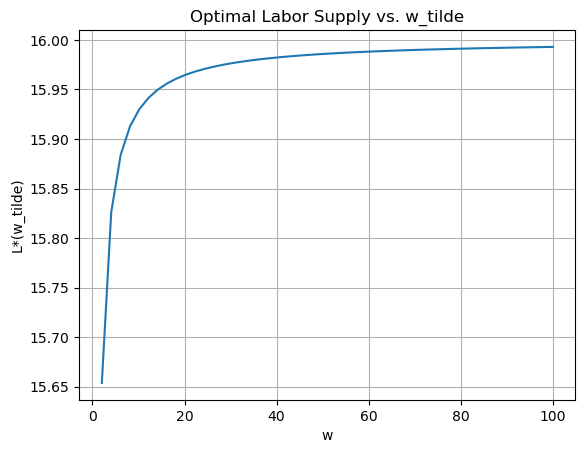

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

# Define the variables and parameters
L, C, w_tilde = sm.symbols('L C w_tilde', positive=True, real=True)
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16**2)
tau = 0.30
G = [1.0, 2.0]
w_range = np.linspace(0, 100)  # Range of w values to plot from 0 to 100

# Define the expression for the optimal labor supply choice
L_optimal = (-kappa + sm.sqrt(kappa**2 + 4 * alpha / v * w_tilde**2)) / (2 * w_tilde)

# Create an empty list to store the calculated L*(w_tilde) values
L_values = []

# Calculate L*(w_tilde) for each w value
for w_val in w_range:
    L_val = L_optimal.subs(w_tilde, (1 - tau) * w_val)
    L_values.append(float(L_val))

# Plot the relationship between L*(w_tilde) and ω
plt.plot(w_range, L_values)
plt.xlabel('w')
plt.ylabel('L*(w_tilde)')
plt.title('Optimal Labor Supply vs. w_tilde')
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


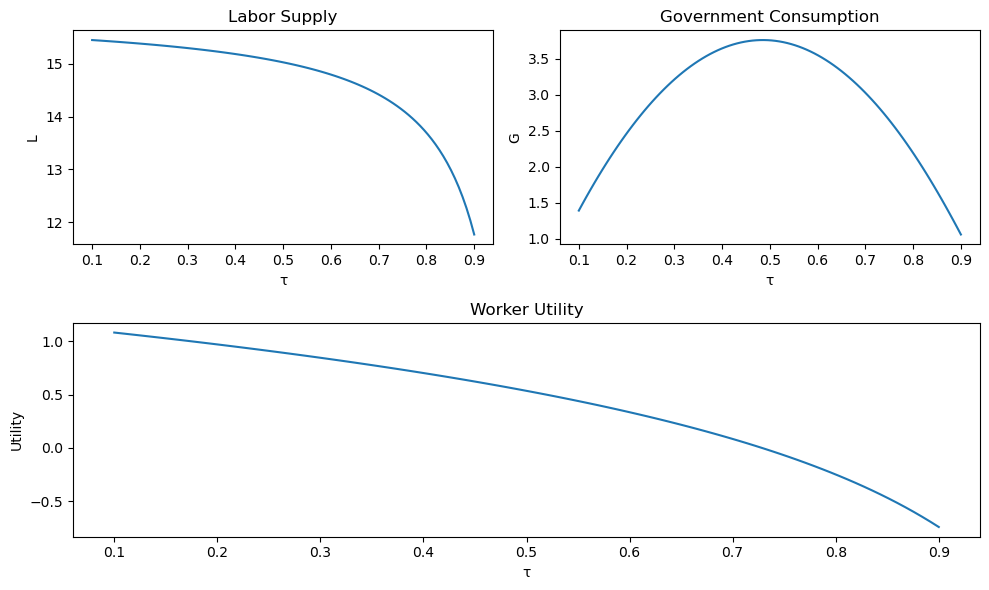

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0

# Define the utility function
def utility(L, w, tau):
    C = kappa + (1 - tau) * w * L
    return np.log(C * alpha * w * (1 - alpha)) - (nu * L ** 2) / 2

# Define the equation for G
def government_consumption(L, w, tau):
    return tau * w * L * ((1 - tau) * w)

# Create a grid of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Calculate the implied values of L, G, and utility for each tau value
L_values = []
G_values = []
utility_values = []

for tau in tau_values:
    # Solve for the optimal labor supply (L*)
    L_star = -kappa/(2*((1 - tau) * w)) + np.sqrt(4*alpha*((1 - tau) * w)**2 + kappa**2*v)/(2*np.sqrt(v)*((1 - tau) * w))
    L_values.append(L_star)
    
    # Calculate the implied government consumption (G)
    G = government_consumption(L_star, w, tau)
    G_values.append(G)
    
    # Calculate the utility
    U = utility(L_star, w, tau)
    utility_values.append(U)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(tau_values, L_values)
plt.xlabel('τ')
plt.ylabel('L')
plt.title('Labor Supply')

plt.subplot(2, 2, 2)
plt.plot(tau_values, G_values)
plt.xlabel('τ')
plt.ylabel('G')
plt.title('Government Consumption')

plt.subplot(2, 1, 2)
plt.plot(tau_values, utility_values)
plt.xlabel('τ')
plt.ylabel('Utility')
plt.title('Worker Utility')

plt.tight_layout()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [93]:
import numpy as np
from scipy.optimize import minimize_scalar

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

# Define the utility function to be maximized
def utility(tau):
    l = -kappa/(2*((1 - tau) * w)) + np.sqrt(4*alpha*((1 - tau) * w)**2 + kappa**2*v)/(2*np.sqrt(v)*((1 - tau) * w))
    c = kappa + (1 - tau) * w * l
    return np.log(c**alpha * (tau * w * l)) - nu * l**2 / 2

# Define the objective function to be minimized (negative utility to maximize)
def objective(tau):
    return -utility(tau)

# Find the optimal tax rate τ^* that maximizes worker utility
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
tau_star = result.x
worker_utility = -result.fun

print("Optimal Tax Rate (τ^*):", tau_star)
print("Worker Utility:", worker_utility)

Optimal Tax Rate (τ^*): 0.6632113083865377
Worker Utility: 2.9500324584788165


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [1]:
import numpy as np
from scipy import optimize

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0

# Define the utility function
def utility(L, w, tau, G, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    return (((alpha * C * (sigma / (1 - sigma)) + (1 - alpha) * G * (sigma / (1 - sigma))) * (sigma / (1 - sigma))) * (1 - rho) - 1) / (1 - rho) - nu * L ** (1 + epsilon) / (1 + epsilon)

# Define the constraint function
def constraint(G, w, tau, sigma, rho, epsilon):
    def objective(L):
        return -utility(L, w, tau, G, sigma, rho, epsilon)
    
    result = optimize.minimize_scalar(objective, bounds=(0, 24), method='bounded')
    return result.x

# Define the function to find G that satisfies the constraint equation
def find_G(tau, w, sigma, rho, epsilon):
    def objective(G):
        return constraint(G, w, tau, sigma, rho, epsilon) - tau * w * constraint(G, w, tau, sigma, rho, epsilon) * ((1 - tau))
    
    G_solution = optimize.root_scalar(objective, method='brentq', bracket=[0, 100])
    return G_solution.root

# Set 1: σ=1.001, ρ=1.001, ε=1.0
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0

# Set 2: σ=1.5, ρ=1.5, ε=1.0
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

# Use the socially optimal tax rate obtained in Question 4
tau_star = 0.

# Calculate G that solves the constraint equation for each set of parameters
G_set1 = find_G(tau_star, w, sigma1, rho1, epsilon1)
G_set2 = find_G(tau_star, w, sigma2, rho2, epsilon2)

print(f"For Set 1: G = {G_set1:.4f}")
print(f"For Set 2: G = {G_set2:.4f}")

ValueError: f(a) and f(b) must have different signs

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [94]:
import numpy as np
from scipy.optimize import minimize_scalar
L, C, G, w_tilde, tau = sm.symbols('L C G w_tilde tau', positive=True, real=True)
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16**2)
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Define the utility function for a given set of parameters
def utility(tau, set1 = False, set2 = False):
    if set1:
        sigma= 1.001
        rho = 1.001
        epsilon = 1.0
    elif set2:
        sigma = 1.5
        rho = 1.5
        epsilon = 1.0
    L = -kappa/(2*((1 - tau) * w)) + np.sqrt(4*alpha*((1 - tau) * w)**2 + kappa**2*v)/(2*np.sqrt(v)*((1 - tau) * w))
    G = tau*w*L
    C = kappa + (1 - tau) * w * L
    return (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1-rho) - v * L**(1+epsilon) / (1+epsilon)

# Define the objective function to be minimized (negative utility to maximize)
def objective(tau):
    return -utility(tau, set1=True)

# Find the optimal tax rate τ^* that maximizes worker utility
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
tau_star = result.x
worker_utility = -result.fun

print("Optimal Tax Rate (τ^*):", tau_star, "with set 1")
print("Worker Utility:", worker_utility, "with set 1")

def objective(tau):
    return -utility(tau, set2=True)

# Find the optimal tax rate τ^* that maximizes worker utility
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
tau_star = result.x
worker_utility = -result.fun

print("Optimal Tax Rate (τ^*):", tau_star,  "with set 2")
print("Worker Utility:", worker_utility,  "with set 2")

Optimal Tax Rate (τ^*): 0.5145457228873289 with set 1
Worker Utility: 1.8570402077172021 with set 1
Optimal Tax Rate (τ^*): 0.5528563605742063 with set 2
Worker Utility: 1.0735686493502712 with set 2


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [95]:
# Set magics
import sympy as sp

# Define the symbols
kappa_t, l_t, eta, w = sp.symbols('kappa_t l_t eta w')

# Define the profit function
profit = kappa_t * l_t**(1 - eta) - w * l_t

# Calculate the derivative with respect to l_t
derivative = sp.diff(profit, l_t)

# Simplify the derivative expression
derivative = sp.simplify(derivative)

# Print the derivative
print("The derivative of the profit function with respect to l_t:")
print(derivative)

# Calculating the FOC
FOC = sp.solve(derivative, l_t)

# Print the FOC of l_t
print("The FOC wrt. l_t is:")
print("l_t =", FOC)



The derivative of the profit function with respect to l_t:
(-eta*kappa_t + kappa_t - l_t**eta*w)/l_t**eta
The FOC wrt. l_t is:
l_t = [(kappa_t*(1 - eta)/w)**(1/eta)]


In [105]:
import numpy as np

η = 0.5
w = 1.0

# Set kappa values
κ_values = [1.0, 2.0]

# Calculate profit for kappa values
for κ in κ_values:
    l = ((1 - η) * κ / w) ** (1 / η)
    profit = κ * l ** (1 - η) - w * l
    
    print(f"For κ = {κ}: Profit = {profit:.2f}")

For κ = 1.0: Profit = 0.25
For κ = 2.0: Profit = 1.00


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [97]:
import numpy as np

# Definine and set the different parameters and variables
eta = 0.5  # Elasticity of demand
w = 1.0  # Wage for each hairdresser
rho = 0.9  # Autoregressive coefficient for demand shock
ι = 0.01  # Fixed adjustment cost
σ_epsilon = 0.1  # Standard deviation of demand shock
R = (1 + 0.01) ** (1/12)  # Monthly discount factor
initial_kappa = 1.0  # Initial demand shock
planning_horizon = 120  # Number of months in the planning horizon
K = 1000  # Number of shock series to simulate for the approximation of ex ante value

# Defining and simulating a shock series for the demand
def simulate_shock_series():
    epsilon = np.random.normal(loc=-0.5 * (σ_epsilon ** 2), scale=σ_epsilon, size=planning_horizon)
    kappa = np.zeros(planning_horizon)
    kappa[0] = initial_kappa

    for t in range(1, planning_horizon):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + epsilon[t])

    return kappa

# Define and calculate the ex post value of the salon wrt. a given shock series
def calculate_ex_post_value(kappa_series):
    l_prev = 0.0
    ex_post_value = 0.0

    for t in range(planning_horizon):
        kappa_t = kappa_series[t]
        l_t = ((1 - eta) * kappa_t / w) ** (1 / eta)
        adjustment_cost = ι if l_t != l_prev else 0.0
        profit = kappa_t * (l_t ** (1 - eta)) - w * l_t - adjustment_cost
        ex_post_value += profit
        l_prev = l_t

    return ex_post_value

# Define and calculate the ex ante value of the salon by approximating the expected value over multiple shock series
def calculate_ex_ante_value():
    ex_ante_value = 0.0

    for _ in range(K):
        kappa_series = simulate_shock_series()
        ex_post_value = calculate_ex_post_value(kappa_series)
        ex_ante_value += ex_post_value

    return ex_ante_value / K

H = calculate_ex_ante_value()
print(f"Approximated ex ante value of the salon: H = {H}")

Approximated ex ante value of the salon: H = 29.256432439375548


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [98]:
import numpy as np

eta = 0.5  # Elasticity of demand
w = 1.0  # Wage for each hairdresser
rho = 0.9  # Autoregressive coefficient for demand shock
ι = 0.01  # Fixed adjustment cost
σ_epsilon = 0.1  # Standard deviation of demand shock
R = (1 + 0.01) ** (1/12)  # Monthly discount factor
initial_kappa = 1.0  # Initial demand shock
planning_horizon = 120  # Number of months in the planning horizon
K = 1000  # Number of shock series to simulate for the approximation of ex ante value
delta = 0.05  # Value for the difference between l_(t-1) and l_t

# Calculating the value of l_t based on the policy with a threshold delta
def calculate_l_t(kappa_t, l_prev):
    if abs(l_prev - kappa_t * ((1 - eta) * kappa_t / w) ** (1 / eta)) > delta:
        l_t = ((1 - eta) * kappa_t / w) ** (1 / eta)
    else:
        l_t = l_prev

    return l_t

# Calculating the ex post value of the salon for a given shock series with the modified policy
def calculate_ex_post_value(kappa_series):
    l_prev = 0.0
    ex_post_value = 0.0

    for t in range(planning_horizon):
        kappa_t = kappa_series[t]
        l_t = calculate_l_t(kappa_t, l_prev)
        adjustment_cost = ι if l_t != l_prev else 0.0
        profit = kappa_t * (l_t ** (1 - eta)) - w * l_t - adjustment_cost
        ex_post_value += profit
        l_prev = l_t

    return ex_post_value

# Calculating the ex ante value of the salon by approximating the expected value over multiple shock series
def calculate_ex_ante_value():
    ex_ante_value = 0.0

    for _ in range(K):
        kappa_series = simulate_shock_series()
        ex_post_value = calculate_ex_post_value(kappa_series)
        ex_ante_value += ex_post_value

    return ex_ante_value / K

H = calculate_ex_ante_value()
print(f"Approximated ex ante value of the salon: H = {H}")

Approximated ex ante value of the salon: H = 29.729013468307652


Yes, the profitability of the salon improves when $\Delta = 0.05$.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

**PLEASE NOTE THAT THE CODE BELOW MIGHT TAKE MORE THAN ONE MINUTE AND A FEW SECONDS TO LOAD THE ANSWER**

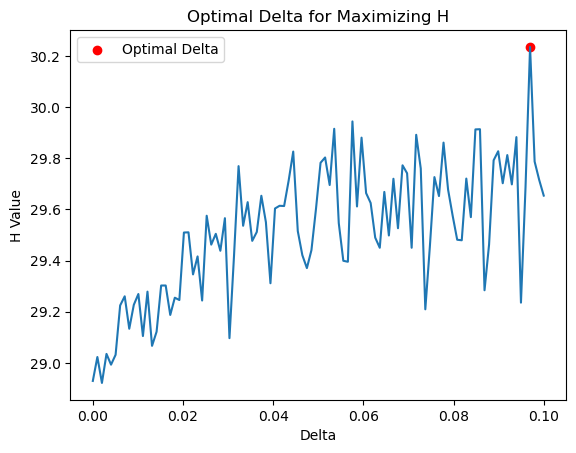

To maximize H: ∆ = 0.09696969696969697


In [104]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.5  # Elasticity of demand
w = 1.0  # Wage for each hairdresser
rho = 0.9  # Autoregressive coefficient for demand shock
ι = 0.01  # Fixed adjustment cost
σ_epsilon = 0.1  # Standard deviation of demand shock
R = (1 + 0.01) ** (1 / 12)  # Monthly discount factor
initial_kappa = 1.0  # Initial demand shock
planning_horizon = 120  # Number of months in the planning horizon
K = 1000  # Number of shock series to simulate for the approximation of ex ante value

# Simulating shock series
def simulate_shock_series():
    kappa_series = [initial_kappa]
    for _ in range(planning_horizon - 1):
        epsilon_t = np.random.normal(-0.5 * (σ_epsilon ** 2), σ_epsilon)
        kappa_t = rho * np.log(kappa_series[-1]) + epsilon_t
        kappa_series.append(np.exp(kappa_t))
    return kappa_series

# Calculating the value of l_t based on the policy with a threshold delta.
def calculate_l_t(kappa_t, l_prev, delta):
    if abs(l_prev - kappa_t * ((1 - eta) * kappa_t / w) ** (1 / eta)) > delta:
        l_t = ((1 - eta) * kappa_t / w) ** (1 / eta)
    else:
        l_t = l_prev

    return l_t

# Calculating the ex post value of the salon for a given shock series with the modified policy
def calculate_ex_post_value(kappa_series, delta):
    l_prev = 0.0
    ex_post_value = 0.0

    for t in range(planning_horizon):
        kappa_t = kappa_series[t]
        l_t = calculate_l_t(kappa_t, l_prev, delta)
        adjustment_cost = ι if l_t != l_prev else 0.0
        profit = kappa_t * (l_t ** (1 - eta)) - w * l_t - adjustment_cost
        ex_post_value += profit
        l_prev = l_t

    return ex_post_value

# Calculating the ex ante value of the salon by approximating the expected value over multiple shock series
def calculate_ex_ante_value(delta):
    ex_ante_value = 0.0

    for _ in range(K):
        kappa_series = simulate_shock_series()
        ex_post_value = calculate_ex_post_value(kappa_series, delta)
        ex_ante_value += ex_post_value

    return ex_ante_value / K

# Plot H values for the optimal delta
def plot_optimal_delta(deltas, h_values, optimal_delta):
    plt.plot(deltas, h_values)
    plt.scatter(optimal_delta, max(h_values), color='red', label='Optimal Delta')
    plt.xlabel('Delta')
    plt.ylabel('H Value')
    plt.title('Optimal Delta for Maximizing H')
    plt.legend()
    plt.show()

# Find optimal delta that maximizes H
def find_optimal_delta():
    deltas = np.linspace(0, 0.1, 100)  # Grid search over delta values
    optimal_delta = None
    max_h_value = float('-inf')
    h_values = []

    for delta in deltas:
        H = calculate_ex_ante_value(delta)
        h_values.append(H)
        if H > max_h_value:
            max_h_value = H
            optimal_delta = delta

    plot_optimal_delta(deltas, h_values, optimal_delta)
    return optimal_delta

optimal_delta = find_optimal_delta()
print(f"To maximize H: ∆ = {optimal_delta}")


**PLEASE NOTE THAT THE CODE ABOVE MIGHT TAKE MORE THAN ONE MINUTE AND A FEW SECONDS TO LOAD THE ANSWER**


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We suggest to implement a policy in the model that introduces the workforce and an adjustment parameter, which represents the fixed percentage adjustment to the workforce. The policy adjusts the workforce based on the comparison between the previous month's demand shock ($\kappa_{t-1}$) and the current month's demand shock ($\kappa_{t}$).

Please note that the value of the workforce and the parameter adjustment have been randomly chosen.

In [100]:
import numpy as np

eta = 0.5  # Elasticity of demand
w = 1.0  # Wage for each hairdresser
ρ = 0.9  # Autoregressive coefficient for demand shock
ι = 0.01  # Fixed adjustment cost
σ_epsilon = 0.1  # Standard deviation of demand shock
R = (1 + 0.01) ** (1/12)  # Monthly discount factor
initial_kappa = 1.0  # Initial demand shock
planning_horizon = 120  # Number of months in the planning horizon
K = 1000  # Number of shock series to simulate for the approximation of ex ante value
workforce_adjustment = 0.1  # Percentage adjustment to the workforce (randomly chosen)

# Calculates the ex ante value of the salon with the alternative policy.
def calculate_ex_ante_value():
    ex_ante_values = []

    for _ in range(K):
        kappa_series = np.exp(np.random.normal(-0.5 * σ_epsilon ** 2, σ_epsilon, planning_horizon))
        workforce = 1 # set randomly
        ex_post_value = 0.0

        for t in range(1, planning_horizon):
            kappa_t_minus_1 = kappa_series[t - 1]
            kappa_t = kappa_series[t]
            workforce_adjusted = workforce * (1 + workforce_adjustment) if kappa_t_minus_1 < kappa_t else workforce * (1 - workforce_adjustment)
            adjustment_cost = ι if workforce_adjusted != workforce else 0.0
            profit = kappa_t * workforce_adjusted ** (1 - eta) - w * workforce_adjusted - adjustment_cost
            ex_post_value += profit
            workforce = workforce_adjusted

        ex_ante_values.append(ex_post_value)

    return np.mean(ex_ante_values)

# Calculate H with the alternative policy
H_alternative = calculate_ex_ante_value()
print("Profitability with the alternative workforce policy: H =", H_alternative)

Profitability with the alternative workforce policy: H = 5.807762823495316


Compared to previous results, the workforce does not improve the profitability when the workforce is equal to 1 and the adjustment parameter is set to 10%.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [101]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Global Minimum:
f(-0.00000000, -0.00000003) = 0.00000000


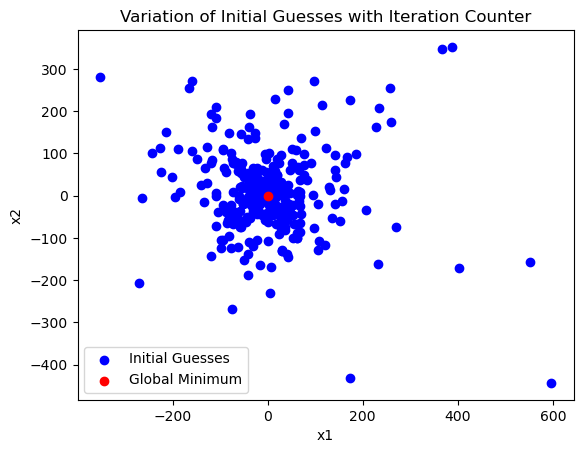

In [102]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# The reader must be aware that in the following coding, K underlined is denoted as K1, and normal K is denoted as K2

def refined_global_optimizer(bounds, tolerance, K1, K2):
    x_star = None
    x_initial_guesses = []
    
    # Iterate for k from 0 to K2-1
    for k in range(K2):
        # Step 3A: Draw random x_k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        # Step 3B: If k >= K1, calculate chi_k and modify the initial guess
        if k >= K1:
            chi_k = 0.5 * (2 / (1 + np.exp((k - K1) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        # Step 3E: Run optimizer with modified initial guess x_k0
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        
        # Step 3F: Update x_star if a better minimum is found
        if x_star is None or result.fun < griewank(x_star):
            x_star = result.x
        
        # Store the initial guess for visualization
        x_initial_guesses.append(x_k0)
        
        # Step 3G: If f(x*) < τ, exit the loop
        if result.fun < tolerance:
            break
    
    return x_star, x_initial_guesses

# Setting
bounds = [-600, 600]
tolerance = 1e-8
K1 = 10
K2 = 1000

# Run the optimizer
x_star, x_initial_guesses = refined_global_optimizer(bounds, tolerance, K1, K2)

# Print the global minimum
print("Global Minimum:")
print("f({:.8f}, {:.8f}) = {:.8f}".format(x_star[0], x_star[1], griewank(x_star)))

# Plot the variation of initial guesses with iteration counter
x_initial_guesses = np.array(x_initial_guesses)
plt.scatter(x_initial_guesses[:, 0], x_initial_guesses[:, 1], c='b', label='Initial Guesses')
plt.scatter(x_star[0], x_star[1], c='r', label='Global Minimum')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variation of Initial Guesses with Iteration Counter')
plt.legend()
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [103]:
import numpy as np
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, K1, K2):
    x_star = None
    
    for k in range(K2):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K1:
            chi_k = 0.5 * (2 / (1 + np.exp((k - K1) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        
        if x_star is None or result.fun < griewank(x_star):
            x_star = result.x
        
        if result.fun < tolerance:
            break
    
    return x_star

# Setting
bounds = [-600, 600]
tolerance = 1e-8
K1_1 = 10  # Original value of K1
K1_2 = 100  # New value of K1
K2 = 1000

# Run the optimizer with original K1 value
x_star_1 = refined_global_optimizer(bounds, tolerance, K1_1, K2)

# Run the optimizer with new K1 value
x_star_2 = refined_global_optimizer(bounds, tolerance, K1_2, K2)

# Calculate the number of iterations required for convergence
iterations_1 = K2 if x_star_1 is None else K2 - 1
iterations_2 = K2 if x_star_2 is None else K2 - 1

# Compare the convergence
if iterations_1 < iterations_2:
    print("Convergence is faster with K1 = 10")
elif iterations_1 > iterations_2:
    print("Convergence is faster with K1 = 100")
else:
    print("Convergence is the same for both K1 values, why it is neither better or worse.")


Convergence is the same for both K1 values, why it is neither better or worse.
